## 1. 유튜브에서 경제뉴스 영상(MP4) 다운로드

코드 출처: https://hleecaster.com/python-pytube/


https://m.blog.naver.com/dsz08082/221753467977<br>
https://wikidocs.net/26366<br>
https://vincinotes.com/%ED%8C%8C%EC%9D%B4%EC%8D%AC-pytube%EB%A1%9C-%EC%9C%A0%ED%8A%9C%EB%B8%8C-%EC%98%81%EC%83%81%EA%B3%BC-%EC%9D%8C%EC%9B%90-%EC%B6%94%EC%B6%9C%ED%95%98%EA%B8%B0/<br>

In [1]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


In [2]:
from pytube import YouTube
import glob
import os.path
import os
import pandas as pd

In [3]:
import re
var_regex = re.compile(r"^\$*\w+\W")

In [4]:
import inspect
print(inspect.getfile(YouTube))


/usr/local/lib/python3.7/dist-packages/pytube/__main__.py


In [5]:
# 수정된 파일 내용이 임시로 저장될 리스트
edited_lines = []

Location = '/usr/local/lib/python3.7/dist-packages/pytube/cipher.py'

with open(Location) as f:
    lines = f.readlines()
    for line in lines:
        # 조건에 따라 원하는 대로 line을 수정
        if 'var_regex = re.compile(r"^\w+\W")' in line:
            edited_lines.append('        var_regex = re.compile(r"^\$*\w+\W") \n')
        else:
            edited_lines.append(line)

with open(Location, 'w') as f:
    f.writelines(edited_lines)

### 여기서 런타임 다시 시작(단축키: Ctrl+M+.(dot))

In [6]:
# 스포츠 뉴스 다운로드
from pytube import Playlist
DOWNLOAD_FOLDER = "/content/dataset/youtube_video/sports"
sports_list = Playlist('https://www.youtube.com/playlist?list=PLzelvdcOWMK-K7VQJ5IRGBh6ZgVMxTjM0')
for video in sports_list.videos:
    video.streams[1].download(DOWNLOAD_FOLDER)

In [7]:
# 경제 뉴스 다운로드
from pytube import Playlist
DOWNLOAD_FOLDER = "/content/dataset/youtube_video/economics"
economics_list = Playlist('https://www.youtube.com/watch?v=2mf0YbA33q8&list=PLzelvdcOWMK_DFdH3pdUnuscRCOpXvPTT&ab_channel=MBCNEWS')
for video in economics_list.videos:
    video.streams[1].download(DOWNLOAD_FOLDER)

In [8]:
# 정치 뉴스 다운로드
from pytube import Playlist
DOWNLOAD_FOLDER = "/content/dataset/youtube_video/politics"
politics_list = Playlist('https://www.youtube.com/watch?v=0Y9xcsG18eI&list=PLzelvdcOWMK_Yl6TlXoXJMKBzYAzmWmwM&ab_channel=SBS%EB%89%B4%EC%8A%A4')
for video in politics_list.videos:
    video.streams[1].download(DOWNLOAD_FOLDER)

In [9]:
# 각 카테고리별 뉴스 수
print(len(sports_list.videos))
print(len(economics_list.videos))
print(len(politics_list.videos))

42
51
50


In [ ]:
# 스포츠 뉴스 리스트 정보 생성
video_link= []
for video in sports_list.video_urls:
  url = video
  yt = YouTube(url)

  video_info = {
      'YouTubeURL' : url,
      'title' : yt.title,
      'length' : yt.length,
      'uploader' : yt.author,
      'upload_date' : yt.publish_date,
      'views' : yt.views,
      'keywords' : yt.keywords,
      'explanation' : yt.description,
      'thumbnail_url' : yt.thumbnail_url,
      'label' : 'sports'
  } 
  video_link.append(video_info)

df_sports = pd.DataFrame(video_link)

In [ ]:
# 경제 뉴스 리스트 정보 생성
video_link= []
for video in economics_list.video_urls:
  url = video
  yt = YouTube(url)

  video_info = {
      'YouTubeURL' : url,
      'title' : yt.title,
      'length' : yt.length,
      'uploader' : yt.author,
      'upload_date' : yt.publish_date,
      'views' : yt.views,
      'keywords' : yt.keywords,
      'explanation' : yt.description,
      'thumbnail_url' : yt.thumbnail_url,
      'label' : 'economics'
  } 
  video_link.append(video_info)

df_economics = pd.DataFrame(video_link)

In [ ]:
# 정치 뉴스 리스트 정보 생성
video_link= []
for video in politics_list.video_urls:
  url = video
  yt = YouTube(url)

  video_info = {
      'YouTubeURL' : url,
      'title' : yt.title,
      'length' : yt.length,
      'uploader' : yt.author,
      'upload_date' : yt.publish_date,
      'views' : yt.views,
      'keywords' : yt.keywords,
      'explanation' : yt.description,
      'thumbnail_url' : yt.thumbnail_url,
      'label' : 'politics'
  } 
  video_link.append(video_info)

df_politics = pd.DataFrame(video_link)

In [ ]:
new_df = df_sports.append(df_economics).append(df_politics)

In [ ]:
new_df.head()

,file_num,YouTubeURL,title,length,uploader,upload_date,views,keywords,explanation,thumbnail_url,lebel
0,sports1,https://www.youtube.com/watch?v=7D6Dwdsa97A,[스포츠 뉴스] '골대 3번'에도 승리‥'월드컵 본선행 청신호' (2021.11.1...,293,MBCNEWS,2021-11-12,111230,"[MBC, MBC뉴스, 뉴스데스크, newsdesk, 뉴스투데이, newstoday...",1. '골대 3번'에도 승리‥'월드컵 본선행 청신호'\n2. '주장의 품격' 손흥민...,https://i.ytimg.com/vi/7D6Dwdsa97A/sddefault.jpg,sports
1,sports1,https://www.youtube.com/watch?v=OViETPB2o70,"손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",680,MBCNEWS,2022-05-22,21265,"[MBC, MBC뉴스, 뉴스데스크, newsdesk, 뉴스투데이, newstoday...","손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...",https://i.ytimg.com/vi/OViETPB2o70/hqdefault.j...,sports
2,sports1,https://www.youtube.com/watch?v=YlbQ-d6gwVU,"[대전미디어 0274_07_MBC] "" 'MBC뉴스데스크' 엔딩(ED)+CF광고+이...",876,대전미디어 [비디오Tape영상변환전문],2019-10-29,56773,"[대전미디어시스템, 선미디어시스템, 비디오테이프CD변환, 비디오테이프DVD변환, 비...",안녕하세요. 세상 모든 종류의 비디오테잎에 대하여 디지털 동영상파일로 변환작업을 전...,https://i.ytimg.com/vi/YlbQ-d6gwVU/sddefault.jpg,sports
3,sports1,https://www.youtube.com/watch?v=BvkvsRFN6ng,EPL 득점왕 손흥민! 귀국 현장 라이브 / SBS,371,SBS 뉴스,2022-05-24,372750,"[SBS NEWS, SBS뉴스, sbs뉴스, sbs8뉴스, 에스비에스, sbs 뉴스...",손흥민이 시즌 종료와 함께 30일 국가대표 소집을 앞두고 오늘 오후 귀국합니다. 전...,https://i.ytimg.com/vi/BvkvsRFN6ng/sddefault.j...,sports
4,sports1,https://www.youtube.com/watch?v=CNz3F2U4Hso,"'부상 투혼' 박장혁, 치열한 선두 경쟁…준결승 진출! (쇼트트랙 남자 1500m ...",346,SBS 뉴스,2022-02-09,112548,"[KOREA NEWS, Korean News, News Network, SBS, S...",9일 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계 올림픽 쇼트트랙 남자...,https://i.ytimg.com/vi/CNz3F2U4Hso/sddefault.jpg,sports


In [ ]:
new_df['title']

0     [스포츠 뉴스] '골대 3번'에도 승리‥'월드컵 본선행 청신호' (2021.11.1...
1     손흥민, EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2...
2     [대전미디어 0274_07_MBC] " 'MBC뉴스데스크' 엔딩(ED)+CF광고+이...
3                         EPL 득점왕 손흥민! 귀국 현장 라이브  / SBS
4     '부상 투혼' 박장혁, 치열한 선두 경쟁…준결승 진출! (쇼트트랙 남자 1500m ...
5             2위를 잡아라! 키움-LG-KIA [야구의 참견 시즌2] 220530 방송
6                              MBC 스포츠 뉴스 1999년 & 2002년
7     [스포츠 뉴스] '선제골에도 무승부' 손흥민 "이기지 못해 슬프다" (2021.10...
0     [뉴스외전 경제 '쏙'] "여행·외식비 빠른 속도로 감소 가능성‥소비 침체 후폭풍"...
1     [뉴스외전 경제 '쏙'] "자산시장 위험 선호 줄어들 것‥코인 영향으로 하반기도 만...
2     #美 인플레 정말 정점? #테슬라, 수명 100년 배터리 개발 / 글로벌 투자뉴스&...
3       (05.30) KEDI30 혁신기업! SK하이닉스 | 나의 투자 전략 | 한국경제TV
4     [뉴스.zip / 뉴스 모아보기] 경제 대국은 옛말, 가난해지는 일본.ZIP #뉴스...
5     #바이든-파월 왜 만나나? #상하이 봉쇄..위안화 강세? / 글로벌 투자뉴스&전략 ...
6      힘들었던 올봄 증시…"하반기 3,000 회복" 낙관 이유는? / SBS / 친절한 경제
7     월가가 바라보는 경기침체 전망 / 정인설 한국경제신문 워싱턴특파원 / 굿모닝한경글로벌마켓
8     악재속에 기회가 있다! 매수기회 잡아라 / 한화솔루션, 롯데관광개발, 성도이엔지 /...
9     [뉴스외전 경제 '쏙'] "양도세 절세 매물, 산발적으로 시장 나올 듯" (

In [ ]:
new_df.to_csv('/content/video.csv', index=False, encoding='utf-8-sig')

## 2. MP4 -> MP3 <br>
https://wh00300.tistory.com/240<br>
https://stackoverflow.com/questions/55550116/saving-audio-from-mp4-as-wav-file-using-moviepy-audiofile

In [ ]:
# moviepy 모듈 설치
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.mkdir('/content/dataset/youtube_audio')

In [ ]:
os.mkdir('/content/dataset/youtube_audio/sports')
os.mkdir('/content/dataset/youtube_audio/economics')
os.mkdir('/content/dataset/youtube_audio/politics')

In [ ]:
import moviepy.editor as mp

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1736704/45929032 bytes (3.8%)4194304/45929032 bytes (9.1%)7102464/45929032 bytes (15.5%)9986048/45929032 bytes (21.7%)12828672/45929032 bytes (27.9%)15589376/45929032 bytes (33.9%)18137088/45929032 bytes (39.5%)20824064/45929032 bytes (45.3%)23724032/45929032 bytes (51.7%)26394624/45929032 bytes (57.5%)28704768/45929032 bytes (62.5%)31113216/45929032 bytes (67.7%)337

In [ ]:
def turn_file_sports(dir) :
  files = os.listdir(dir)

  for data in files :
    file_path = dir+r"/"+data
    new_file_name = data[:-1] + '3'

    clip = mp.VideoFileClip(file_path)
    clip.audio.write_audiofile("/content/dataset/youtube_audio/sports/{}".format(new_file_name))

In [ ]:
def turn_file_economics(dir) :
  files = os.listdir(dir)

  for data in files :
    file_path = dir+r"/"+data
    new_file_name = data[:-1] + '3'

    clip = mp.VideoFileClip(file_path)
    clip.audio.write_audiofile("/content/dataset/youtube_audio/economics/{}".format(new_file_name))


In [ ]:
def turn_file_politics(dir) :
  files = os.listdir(dir)

  for data in files :
    file_path = dir+r"/"+data
    new_file_name = data[:-1] + '3'

    clip = mp.VideoFileClip(file_path)
    clip.audio.write_audiofile("/content/dataset/youtube_audio/politics/{}".format(new_file_name))

In [ ]:
turn_file_sports('/content/dataset/youtube_video/sports')

[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/2위를 잡아라! 키움-LG-KIA [야구의 참견 시즌2] 220530 방송.mp3


100%|██████████| 9037/9037 [00:14<00:00, 607.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/[대전미디어 0274_07_MBC]  MBC뉴스데스크 엔딩(ED)+CF광고+이어서 스포츠뉴스+CF+ID+오프닝(OP)+본 방송+CF+이어서+주말방송안내 방송영상.mp3


100%|██████████| 19318/19318 [00:31<00:00, 620.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/[스포츠 뉴스] 골대 3번에도 승리‥월드컵 본선행 청신호 (20211112뉴스데스크MBC).mp3


100%|██████████| 6466/6466 [00:09<00:00, 706.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/MBC 스포츠 뉴스 1999년 & 2002년.mp3


100%|██████████| 17574/17574 [00:27<00:00, 633.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/EPL 득점왕 손흥민! 귀국 현장 라이브   SBS.mp3


100%|██████████| 8181/8181 [00:11<00:00, 726.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/[스포츠 뉴스] 선제골에도 무승부 손흥민 이기지 못해 슬프다 (20211013뉴스데스크MBC).mp3


100%|██████████| 6569/6569 [00:09<00:00, 701.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/부상 투혼 박장혁 치열한 선두 경쟁…준결승 진출! (쇼트트랙 남자 1500m 준준결승)  SBS.mp3


100%|██████████| 7625/7625 [00:12<00:00, 609.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/sports/손흥민 EPL 공동 득점왕‥아시아 선수 최초 - [LIVE] MBC 930뉴스 2022년 05월 23일.mp3


100%|██████████| 14991/14991 [00:20<00:00, 734.02it/s]

[MoviePy] Done.


In [ ]:
turn_file_economics('/content/dataset/youtube_video/economics')

[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/지금 주목해야 하는…로봇주 톱픽 (오현진) 주식경제 코스닥 히든 챔피언  한국경제TV.mp3


100%|██████████| 13558/13558 [00:16<00:00, 805.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/[뉴스외전 경제 쏙] 여행·외식비 빠른 속도로 감소 가능성‥소비 침체 후폭풍 (20220527뉴스외전MBC).mp3


100%|██████████| 19546/19546 [00:28<00:00, 683.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/또 머스크! 테슬라 6 급락 애플 탈 중국 가속  글로벌 투자뉴스&전략  투자의 아침  한국경제TV.mp3


100%|██████████| 13385/13385 [00:16<00:00, 834.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/일론 머스크 한국 출산율 걱정된다…한국 콕 찍은 이유  SBS  친절한 경제.mp3


100%|██████████| 7310/7310 [00:11<00:00, 648.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/바이든-파월 왜 만나나 상하이 봉쇄위안화 강세  글로벌 투자뉴스&전략  투자의 아침  한국경제TV.mp3


100%|██████████| 14583/14583 [00:17<00:00, 841.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/(0531) KEDI30 혁신기업! 현대차  나의 투자 전략  한국경제TV.mp3


100%|██████████| 9115/9115 [00:13<00:00, 681.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/[뉴스외전 경제 쏙] 자산시장 위험 선호 줄어들 것‥코인 영향으로 하반기도 만만치 않아 (20220526뉴스외전MBC).mp3


100%|██████████| 16910/16910 [00:23<00:00, 707.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/[뉴스zip  뉴스 모아보기] 경제 대국은 옛말 가난해지는 일본ZIP 뉴스zip MBC뉴스.mp3


100%|██████████| 9714/9714 [00:13<00:00, 712.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/가속화되는 블록 경제…하반기 원자재 시장 전망은(최진영) 주식경제 이슈분석  한국경제TV.mp3


100%|██████████| 18244/18244 [00:21<00:00, 838.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/지금이 주식 매수 적기! 수출 대형주를 봐야할 때  박세익 대표  마켓전략  한국경제TV.mp3


100%|██████████| 13576/13576 [00:15<00:00, 868.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/2022년 상반기 경제전망 살펴보기🌟.mp3


100%|██████████| 9113/9113 [00:14<00:00, 650.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/(0525) KEDI30 혁신기업! 삼성전자  나의 투자 전략  한국경제TV.mp3


100%|██████████| 7511/7511 [00:11<00:00, 674.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/[뉴스3] 상하이 1일부터 기업 업무 다시 시작.mp3


100%|██████████| 21552/21552 [00:31<00:00, 693.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/월가가 바라보는 경기침체 전망  정인설 한국경제신문 워싱턴특파원  굿모닝한경글로벌마켓.mp3


100%|██████████| 6780/6780 [00:07<00:00, 861.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/美 인플레 정말 정점 테슬라 수명 100년 배터리 개발  글로벌 투자뉴스&전략  투자의 아침  한국경제TV.mp3


100%|██████████| 12857/12857 [00:15<00:00, 833.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/(0530) KEDI30 혁신기업! SK하이닉스  나의 투자 전략  한국경제TV.mp3


100%|██████████| 7019/7019 [00:09<00:00, 779.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/[뉴스외전 경제 쏙] 양도세 절세 매물 산발적으로 시장 나올 듯 (20220530뉴스외전MBC).mp3


100%|██████████| 19104/19104 [00:27<00:00, 687.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/악재속에 기회가 있다! 매수기회 잡아라  한화솔루션 롯데관광개발 성도이엔지  세컨드찬스 한국경제TV.mp3


100%|██████████| 9856/9856 [00:11<00:00, 841.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/외인이 담는 자동차주 공략 포인트 두 가지  만도  최수창 와우넷 파트너  이삼공종목캐치  성공투자 오후증시  한국경제TV.mp3


100%|██████████| 18593/18593 [00:23<00:00, 788.28it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/증시 바닥 vs 데드캣바운스…하반기 증시 전망과 전략(김영익 서강대 교수) 주식경제 이슈분석  한국경제TV.mp3


100%|██████████| 19338/19338 [00:22<00:00, 841.80it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/dataset/youtube_audio/economics/힘들었던 올봄 증시…하반기 3000 회복 낙관 이유는  SBS  친절한 경제.mp3


100%|██████████| 6620/6620 [00:10<00:00, 639.78it/s]

[MoviePy] Done.


In [ ]:
turn_file_politics('/content/dataset/youtube_video/politics')

[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[숏토리정치] 한동훈 추미애 없앤 합수단 부활  부글부글 민주당 한덕수 부결.mp3


100%|██████████| 10827/10827 [00:12<00:00, 897.68it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/尹정부 원전은…에너지는 정치가 아니다 [뉴스7 취재후 Talk].mp3


100%|██████████| 5488/5488 [00:06<00:00, 825.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/국민투표 시나리오 & 소통령 한동훈 [정치설명서 서반장 vs 김반장].mp3


100%|██████████| 8837/8837 [00:10<00:00, 818.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[숏토리정치] 박지현 586 퇴장해야  진압 나선 지도부 충돌.mp3


100%|██████████| 7981/7981 [00:08<00:00, 906.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV).mp3


100%|██████████| 12634/12634 [00:14<00:00, 878.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치톡톡] 마지막퇴근길  취임식은  이대남 공약 부글부글 [MBN 종합뉴스].mp3


100%|██████████| 8266/8266 [00:10<00:00, 803.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[숏토리정치] 윤-안 첫 출근 화기애애  윤호중 비대위 부글부글.mp3


100%|██████████| 8828/8828 [00:09<00:00, 901.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치톡톡] 2강 1중  김건희 국정감사 개입  진중권 복당 [MBN 종합뉴스].mp3


100%|██████████| 7943/7943 [00:09<00:00, 816.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치톡톡] 한발 물러선 박지현  김포공항 공방  대통령 술자리 [MBN 종합뉴스].mp3


100%|██████████| 8873/8873 [00:12<00:00, 705.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[이성대의 뉴스썰기] 여당 가니 여유 찾은 안철수 철새정치 난 추운 곳만 갔다  JTBC 3시 썰전라이브.mp3


100%|██████████| 12041/12041 [00:14<00:00, 847.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/조응천 “김포공항 이전 대선 때 접었다 몇 달 사이에 바뀌겠나”.mp3


100%|██████████| 21799/21799 [00:28<00:00, 768.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[속보] 안철수 오늘 새정치민주연합 떠난다.mp3


100%|██████████| 6696/6696 [00:06<00:00, 965.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/박지현 ‘팬덤 정치 결별’ 말한 날…이재명 “개딸 고마워”  뉴스A 라이브.mp3


100%|██████████| 9190/9190 [00:10<00:00, 895.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[친절한 정치] 대선 D-57 정치뉴스 사용설명서  연합뉴스TV (YonhapnewsTV).mp3


100%|██████████| 15251/15251 [00:17<00:00, 851.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/한동훈 “정치검찰 출세 지난 3년 가장 심해”  뉴스A 라이브.mp3


100%|██████████| 9679/9679 [00:11<00:00, 858.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치 맞수다] 이재명 기사회생…대권가도로 (20200716뉴스외전MBC).mp3


100%|██████████| 21885/21885 [00:25<00:00, 872.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/유인태 이재명 김포공항 공약 부적절…박지현 비대위원장 임명 정치 희화화  SBS  주영진의 뉴스브리핑.mp3


100%|██████████| 20360/20360 [00:31<00:00, 636.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치톡톡] 4500명 응시  안철수 내일 합당  정책실장 폐지 [MBN 종합뉴스].mp3


100%|██████████| 7925/7925 [00:10<00:00, 784.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[이슈폴폴] 여론조사로 풀어 보는 정치…한 주간 민심은  연합뉴스TV (YonhapnewsTV).mp3


100%|██████████| 21789/21789 [00:24<00:00, 888.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/박지현 연일 ‘개딸’ 저격…“팬덤 정치와 결별”  뉴스A 라이브.mp3


100%|██████████| 11600/11600 [00:12<00:00, 892.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[뉴스라이브] 이번에 지면 정치생명 끽이재명 언행 논란  YTN.mp3


100%|██████████| 14581/14581 [00:16<00:00, 888.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치톡톡] 뚱뚱한데 잘 맞아  우크라이나 방문  보수단체 고소 검토 [MBN 종합뉴스].mp3


100%|██████████| 7491/7491 [00:09<00:00, 814.05it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/dataset/youtube_audio/politics/[정치톡톡] 최소 9곳 vs 최대 8곳  박지현·윤종원 후폭풍  MZ 공무원과 어퍼컷 [MBN 종합뉴스].mp3


100%|██████████| 8249/8249 [00:10<00:00, 820.37it/s]

[MoviePy] Done.


## 3. 음성데이터 자르기

[링크 텍스트](https://)https://ainomix.com/11

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.mkdir('/content/dataset/youtube_sliced_audio')

In [ ]:
os.mkdir('/content/dataset/youtube_sliced_audio/sports')
os.mkdir('/content/dataset/youtube_sliced_audio/economics')
os.mkdir('/content/dataset/youtube_sliced_audio/politics')

In [ ]:
def slice_audio_sports(dir) :
  files = os.listdir(dir)

  for data in files :
    file_path = dir+r"/"+data
    new_file_name = data[:-1] + '3'

    clip = mp.VideoFileClip(file_path)
    clip.audio.write_audiofile("/content/dataset/youtube_audio/sports/{}".format(new_file_name))

In [ ]:
os.listdir('/content/dataset/youtube_audio')

['politics', 'sports', 'economics']

In [ ]:
from pydub import AudioSegment
import math

all_audio = os.listdir('/content/dataset/youtube_audio')

for category in all_audio :
  file_path = '/content/dataset/youtube_audio/' + category
  audio_folder = os.listdir((file_path))
  print(category)
  for audio in audio_folder :
    new_path = '/content/dataset/youtube_sliced_audio/' + category + r'/' + audio[:-4] # .mp3는 제거하고 폴더명 설정
    song = AudioSegment.from_mp3(file_path + r'/' + audio)
    sixty_seconds = 60 * 1000

    os.mkdir(new_path)

    for i in range(int(math.floor(len(song)/60000))):
        slice = song[i*sixty_seconds:sixty_seconds*(i+1)]
        slice.export(new_path + '/audio{}.mp3'.format(i), format="mp3")
    
    print(new_path + '/audio{}.mp3'.format(i)) # 1분 단위로 잘랐을 때, 한 오디오에 몇개의 slice가 생성된지 확인(단, 0번 슬라이스부터 시작)

politics
/content/dataset/youtube_sliced_audio/politics/박지현 ‘팬덤 정치 결별’ 말한 날…이재명 “개딸 고마워”  뉴스A 라이브/audio5.mp3
/content/dataset/youtube_sliced_audio/politics/[이슈폴폴] 여론조사로 풀어 보는 정치…한 주간 민심은  연합뉴스TV (YonhapnewsTV)/audio15.mp3
/content/dataset/youtube_sliced_audio/politics/[이성대의 뉴스썰기] 여당 가니 여유 찾은 안철수 철새정치 난 추운 곳만 갔다  JTBC 3시 썰전라이브/audio8.mp3
/content/dataset/youtube_sliced_audio/politics/조응천 “김포공항 이전 대선 때 접었다 몇 달 사이에 바뀌겠나”/audio15.mp3
/content/dataset/youtube_sliced_audio/politics/유인태 이재명 김포공항 공약 부적절…박지현 비대위원장 임명 정치 희화화  SBS  주영진의 뉴스브리핑/audio14.mp3
/content/dataset/youtube_sliced_audio/politics/[뉴스라이브] 이번에 지면 정치생명 끽이재명 언행 논란  YTN/audio10.mp3
/content/dataset/youtube_sliced_audio/politics/[정치톡톡] 4500명 응시  안철수 내일 합당  정책실장 폐지 [MBN 종합뉴스]/audio4.mp3
/content/dataset/youtube_sliced_audio/politics/[정치톡톡] 뚱뚱한데 잘 맞아  우크라이나 방문  보수단체 고소 검토 [MBN 종합뉴스]/audio4.mp3
/content/dataset/youtube_sliced_audio/politics/[정치톡톡] 최소 9곳 vs 최대 8곳  박지현·윤종원 후폭풍  MZ 공무원과 어퍼컷 [MBN 종합뉴스]/audio5.mp3
/content/dataset/youtube_

## 3. STT 적용

https://api.ncloud-docs.com/beta/docs/ai-naver-clovaspeechrecognition-stt

In [ ]:
import requests

client_id = "본인의 Naver STT id 입력"
client_secret = "본인의 Naver STT secret 입력"
lang = "Kor" # 언어코드{Kor, Jpn, Eng, Chn}
url = "https://naveropenapi.apigw.ntruss.com/recog/v1/stt?lang=" + lang

data = open('/content/newSong_1.mp3', 'rb')
#data = open('./hi.m4a', 'rb')
#data = open('./ma.mp3', 'rb') # 60초넘어서 ST001 Error발생

headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
    "Content-Type" : "application/octet-stream"
}

response = requests.post(url, data=data, headers=headers)
rescode = response.status_code

if(rescode == 200):
    print(response.text)
else :
    print("Error : " + response.text)

{"text":"그러면 투자 주체별로 누가 어떻게 하길래 오리 주가지수가 20 포인트 온라인 거래도 펼 통해서 확인하겠습니다 이게 오늘 우리 실시간 동향인데요 오늘 아침에 외국인들이 선물을 이천 개학을 매도를 했습니다 그때 종합주가 지수 얼마입니까 마이너스 3 포인트입니다 그러다가 지금 제가 화살표로 표시해 둔 데요 외국인들이 가장 많이 맺어 있을때 이천개 메이드 실시간 마이너스 3 포인트인데 정확히 오전 10시 오전 10시에 외국인들은 매도 있던 선물 매수로 전환시켰습니다 그러니까 우리 종합 주가 지수가 그때부터 하늘 높은 줄 모르고 오르기 시작했습니다 결론은 오 제약 상당 정반대입니다 어제는 정확히 오전 10시에 외국인들이 밑에서 매도로 전환 되면 서울이 추가로 하루종일 내릴 지 않습니까 오늘은 그 반대로 외국인들이 오전 10시부터 선물을 매수 하면서 우리 주가지수를 올리기 시작한 겁니다 저 제가 얘기를 하고 나서 단"}


In [ ]:
os.mkdir('/content/dataset/youtube_text')
os.mkdir('/content/dataset/youtube_text/sports')
os.mkdir('/content/dataset/youtube_text/economics')
os.mkdir('/content/dataset/youtube_text/politics')

In [ ]:
import requests

client_id = "77fwbmo2rl"
client_secret = "T0El0IgnU3vKgD8usSzkhY29MUeRb20CXBgdGBD9"
lang = "Kor" # 언어코드{Kor, Jpn, Eng, Chn}
url = "https://naveropenapi.apigw.ntruss.com/recog/v1/stt?lang=" + lang

headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
    "Content-Type" : "application/octet-stream"
}



for category in os.listdir('/content/dataset/youtube_sliced_audio') :
  sliced_audio = '/content/dataset/youtube_sliced_audio/' + category
  sliced_audio_folder = os.listdir(sliced_audio)
  print(category)

  for sliced_audio in sliced_audio_folder :
    segment = '/content/dataset/youtube_sliced_audio/' + category + r'/' + sliced_audio
    segment_folder = sorted(os.listdir(segment))

    #print(sliced_audio)
    print(segment)
    #print(segment_folder)

    segment_index = []
    for seg in os.listdir(segment) :
      segment_index.append(int(seg[5:-4])) # audio number(index)에 접근

    sorted_index = sorted(segment_index)
    sorted_segment_index = []
    for index in sorted_index :
      sorted_segment_index.append('audio' + str(index) + '.mp3')
    print(sorted_segment_index)


    new_text = ''
    for audio in sorted_segment_index :
      print(segment + r'/' + audio)
      data = open(segment + r'/' + audio, 'rb')

      response = requests.post(url, data=data, headers=headers)
      rescode = response.status_code

      if(rescode == 200):
        new_text = new_text + response.text[9:-2]
      
        print(response.text)
      else :
        print("Error : " + response.text) 

    text_path = '/content/dataset/youtube_text/' + category + r'/' + segment.split('/')[5] + '.txt'
    f = open(text_path, 'w')
    f.write(new_text)
    f.close()    
  



politics
/content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)
['audio0.mp3', 'audio1.mp3', 'audio2.mp3', 'audio3.mp3', 'audio4.mp3', 'audio5.mp3', 'audio6.mp3', 'audio7.mp3', 'audio8.mp3']
/content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio0.mp3
{"text":"여야 후보에 대한 비호감이 커지면서 대선 후보 교체가 필요하다는 여론이 과반 이상을 차지한것으로 나타났습니다 덩달아 안철수 후보의 몸값도 다시 오르고 있는데요 이 시간에 정치권 이슈를 이강 윤 정치 평론가와 함께 짚어 보도록 하겠습니다 아니었을까 안녕하세요 내 대선까지 d 69일 70일도 안 남았는데 여론조사 결과 좀 나왔습니다 한번 살펴볼까요 먼저 갤럽에서 나온 조사를 보면 다자 대결 결과입니다 이재명 후보자가 36.8% 윤석열 후보가 30.8%로 이재명 후보가 오차와 인보관의 격차를 보이며 앞서고인것으로 나타 났 구요 눈에 띄는것은 이제 네번째 있죠 안철수 후보의 지지율인데 9.3%입니다 거의 두 자리수인 10%에 육박한것으로 나와 있구요 또 눈에 대해 조사 결과 하나 더 보겠습니다 한길 리서치에서 여야 대선 후보 교체 필요성 필요 하냐라는 조사를 했습니다 응답자의 56점 6퍼센트가"}
/content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio1.mp3
{"text":"얘기를 했는데 지지 정당별로 보면 더불 어민주당보다는 국내에서 후보 교체 필요 여론이 높은것으로 나타났습니다 메모지 디스가 윤석열 보호 같은 

In [ ]:
# 약 4시간 정도 실행해서 얻은 너무너무 소중한 데이터를 압축하여 local에 다운로드하도록 합니다.
!zip -r /content/dataset/youtube_text.zip /content/dataset/youtube_text

  adding: content/dataset/youtube_text/ (stored 0%)
  adding: content/dataset/youtube_text/politics/ (stored 0%)
  adding: content/dataset/youtube_text/politics/[이슈폴폴] 여론조사로 풀어 보는 정치…한 주간 민심은  연합뉴스TV (YonhapnewsTV).txt (deflated 57%)
  adding: content/dataset/youtube_text/politics/박지현 연일 ‘개딸’ 저격…“팬덤 정치와 결별”  뉴스A 라이브.txt (deflated 59%)
  adding: content/dataset/youtube_text/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV).txt (deflated 57%)
  adding: content/dataset/youtube_text/politics/유인태 이재명 김포공항 공약 부적절…박지현 비대위원장 임명 정치 희화화  SBS  주영진의 뉴스브리핑.txt (deflated 55%)
  adding: content/dataset/youtube_text/politics/[속보] 안철수 오늘 새정치민주연합 떠난다.txt (deflated 54%)
  adding: content/dataset/youtube_text/politics/尹정부 원전은…에너지는 정치가 아니다 [뉴스7 취재후 Talk].txt (deflated 53%)
  adding: content/dataset/youtube_text/politics/박지현 ‘팬덤 정치 결별’ 말한 날…이재명 “개딸 고마워”  뉴스A 라이브.txt (deflated 58%)
  adding: content/dataset/youtube_text/politics/[숏토리정치] 윤-안 첫 출근 화기애애  윤호중 비대위 부글부글.txt (deflated 45%)
  adding: cont

In [ ]:
# 이 데이터도 가공하는데 오래걸리니 압축하여 다운로드합니다.
!zip -r /content/dataset/youtube_sliced_audio.zip /content/dataset/youtube_sliced_audio

  adding: content/dataset/youtube_sliced_audio/ (stored 0%)
  adding: content/dataset/youtube_sliced_audio/politics/ (stored 0%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/ (stored 0%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio3.mp3 (deflated 1%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio7.mp3 (deflated 1%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio0.mp3 (deflated 1%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio1.mp3 (deflated 1%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수  연합뉴스TV (YonhapnewsTV)/audio5.mp3 (deflated 1%)
  adding: content/dataset/youtube_sliced_audio/politics/[정치+] 역대급 비호감 대선…몸값 높아지는 안철수 

# 이 아래로 필요없는 부분
코드 오류발생시, 참고용으로 남겨둠

In [ ]:
# 뉴스 텍스트 잘 이어지는지 한개로 테스트

new_text = ''
for audio in sorted_segment_index :
  print(segment + r'/' + audio)
  data = open(segment + r'/' + audio, 'rb')

  response = requests.post(url, data=data, headers=headers)
  rescode = response.status_code

  if(rescode == 200):
    new_text = new_text + response.text[9:-2]
  
    print(response.text)
  else :
    print("Error : " + response.text) 

text_path = '/content/dataset/youtube_text/' + category + r'/' + segment.split('/')[5] + '.txt'
f = open(text_path, 'w')
f.write(new_text)
f.close()

/content/dataset/youtube_sliced_audio/economics/가속화되는 블록 경제…하반기 원자재 시장 전망은(최진영) 주식경제 이슈분석  한국경제TV/audio0.mp3
{"text":"최준용 이베스트 투자증권 오늘 스튜디오 나 오셨는데요 원자재 관련해서는 보상 등 전문 가십니다 그 인사 드리겠습니다 윤건이와 소 새와 내신에 학자금 질문 먼저 첫줄 만들기 전에 먼저 질문들 계시면 저번에 나 오셨을 때는 곡물 원자재 대해 소개 8월 9월 10월까지도 지속할 수 있다 이렇게 말씀 하셨나요 제가 살짝 까먹어 가지고 가면 다시 한번 얘기해 주세요 일단은 89회까지 연장될 수 있다라는 그 원인에 대해서 좀 찾아볼 필요가 있겠는데 내게 복 상반기 대 파종 시즌 대표적으로 올 3월부터 시작해서 6월까지가 파종 시 지나 볼수가 없겠는데 그 파종 시즌 때 이미 비료 가격 자체가 날라 가 버렸죠 그 비료의 날 나가기때문에"}
/content/dataset/youtube_sliced_audio/economics/가속화되는 블록 경제…하반기 원자재 시장 전망은(최진영) 주식경제 이슈분석  한국경제TV/audio1.mp3
{"text":"미국 같은 지역들 같으면 파종이 지연되고 있어요 파종 이제 진 척도가 굉장히 낮은 수준이거든요 왜 그런 거 같다 놓고 본다면은 격 문제점은 라니냐도 연장 되고 비료 가격도 이미 높아진 상태에서 결과 주의 문제점이 8 9월 달에서 수확 시즌 임대 공급가이던 스가 또다시 추가적으로 하향조정 될 우려가 있다 보니 아 우리가 농산물 가격 자 채택해 곡물 가격 자체가 어 지금 레벨 수준에서 못해도 8월까지 연장될 수 있다라고 볼수가 있겠구요 음 그러면은 사실은 그 cpi나 아님 pc나 이런데 국물이 얼마나 추 싱 링 얼마나 차지예요 뭐 싶은 같은 경우에는 물가에 비중마다 조금씩 차이를 두고 있지만의 미국 같은 기준으로는 어 부동산이 아마 40에서 45프로 정도 되야 네 그다음에 식품이 가장 많을 겁니다 저도 정확히 기억은 안나지만 네

## MP3 -> WAV (안 써도 됨)

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment

# files                                                                       
src = "/content/audio.mp3"
dst = "test.wav"

# convert wav to mp3                                                            
audSeg = AudioSegment.from_mp3(src)
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='test.wav'>

## 음성데이터 자르기 예비 코드

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


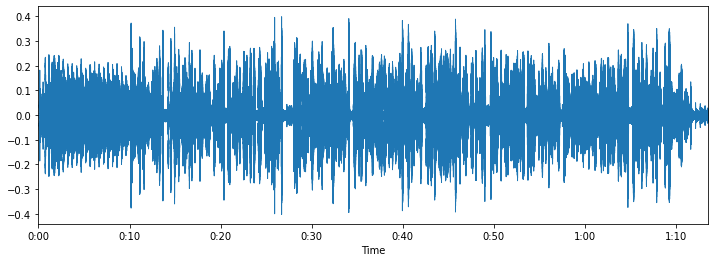

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load("/content/youtube_video/[신선한 경제] 스벅 굿즈 품절 대란 사라졌다 (20220519뉴스투데이MBC).mp4");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [ ]:
# https://dataunbox.com/split-audio-files-using-python/

from pydub import AudioSegment
from pydub.silence import split_on_silence
 
sound_file = AudioSegment.from_wav("/content/test.wav")
audio_chunks = split_on_silence(sound_file, min_silence_len=600, silence_thresh=-50 )
 
for i, chunk in enumerate(audio_chunks):
   out_file = "chunk{0}.wav".format(i)
   print("exporting", out_file)
   chunk.export(out_file, format="wav")

exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav
